<a href="https://colab.research.google.com/github/ksy3432/ai-class-DL-Application-/blob/main/DLA_week1_abalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 전복 데이터를 이용하여 머신러닝 5가지 분류 수행(SVM, LR, RF, DT, KNN)

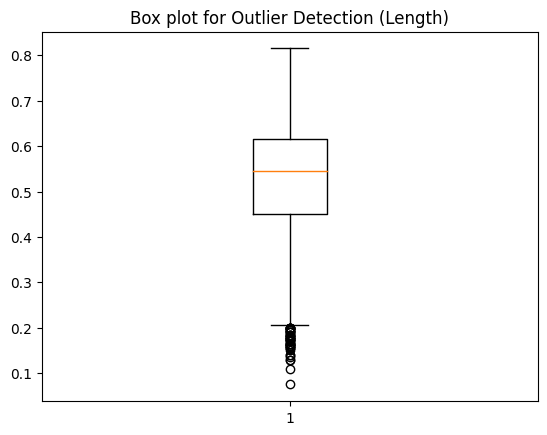

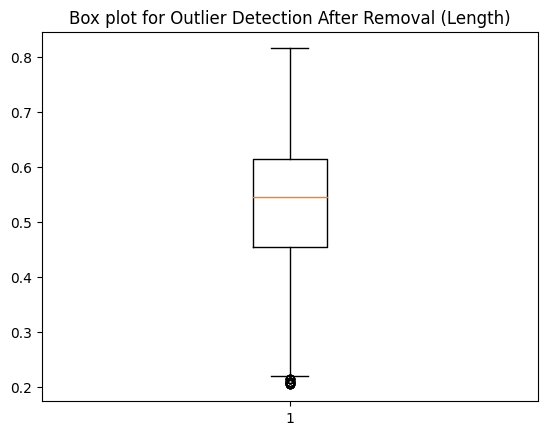

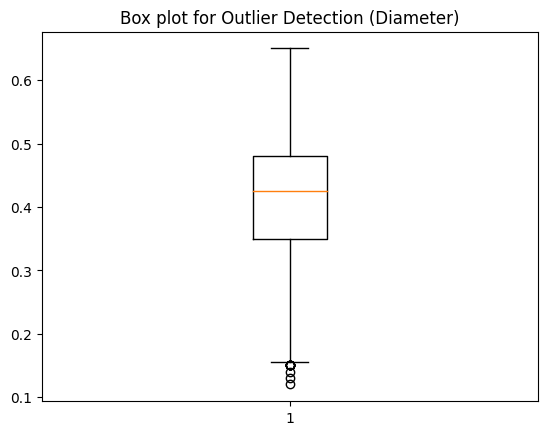

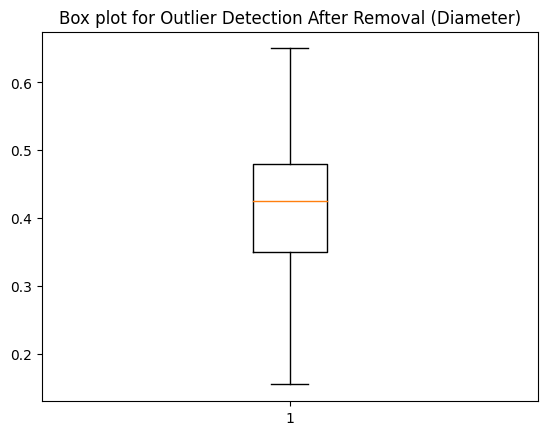

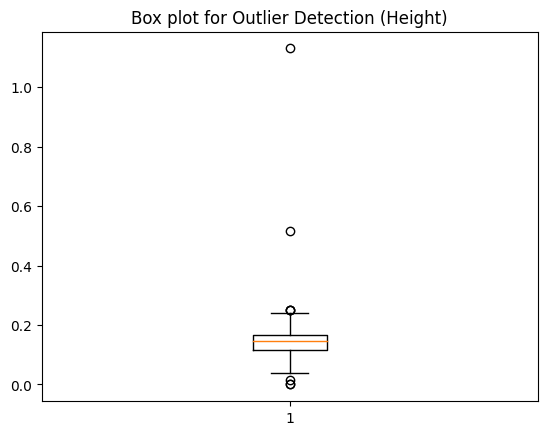

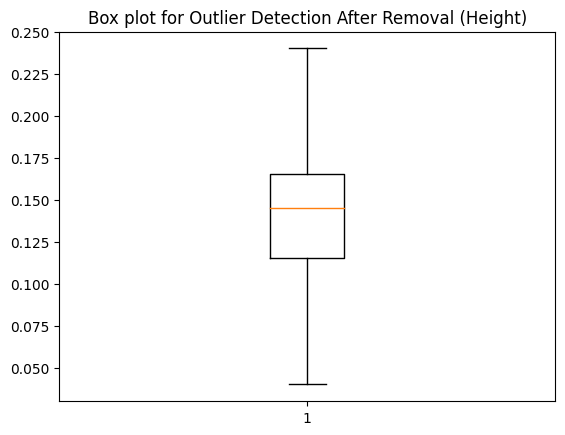

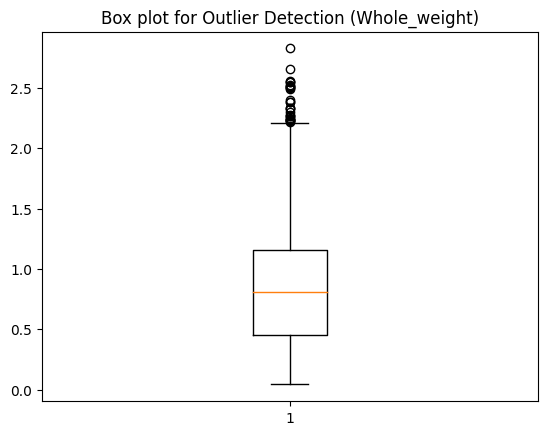

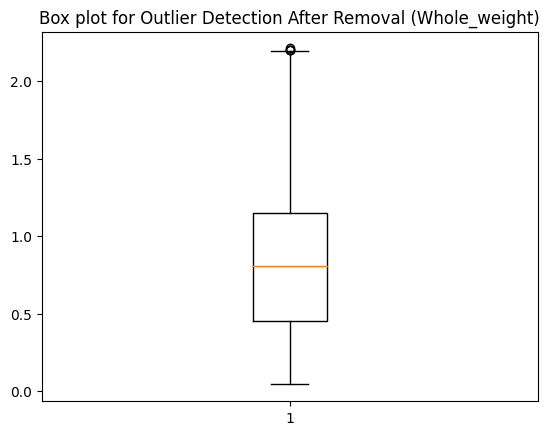

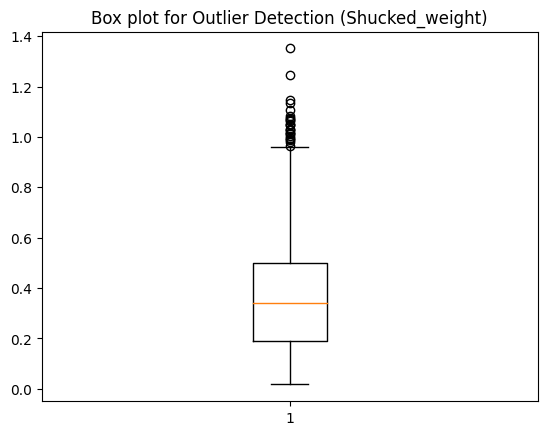

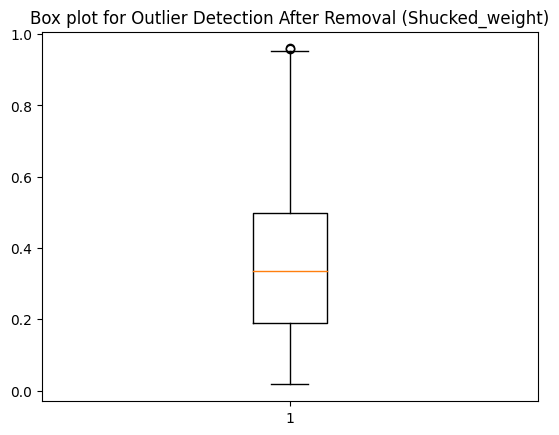

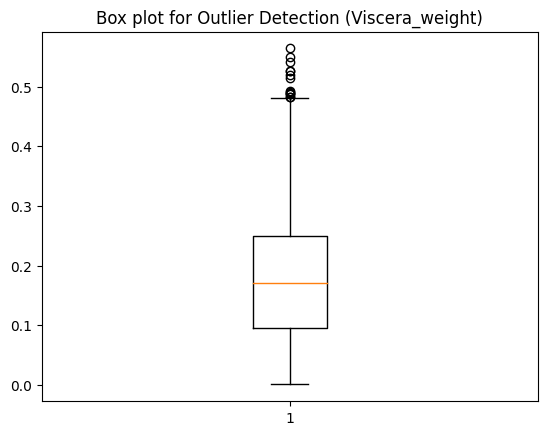

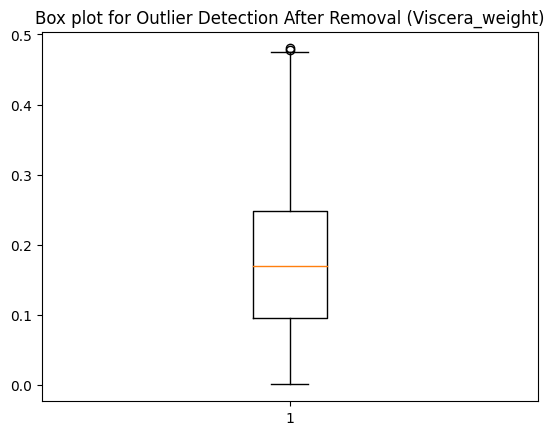

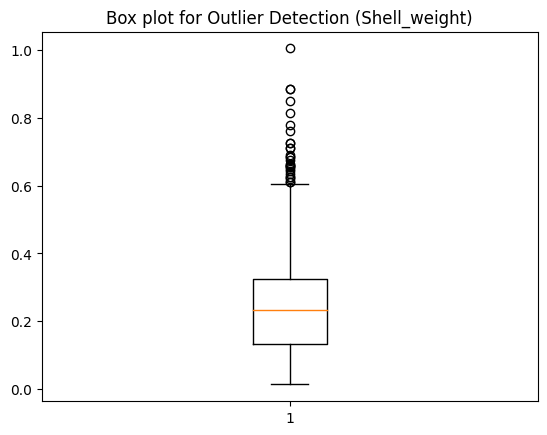

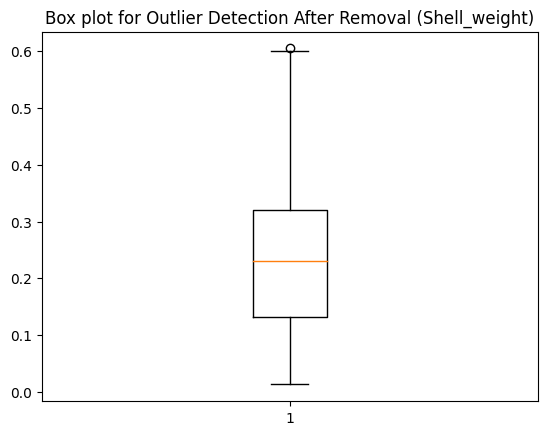

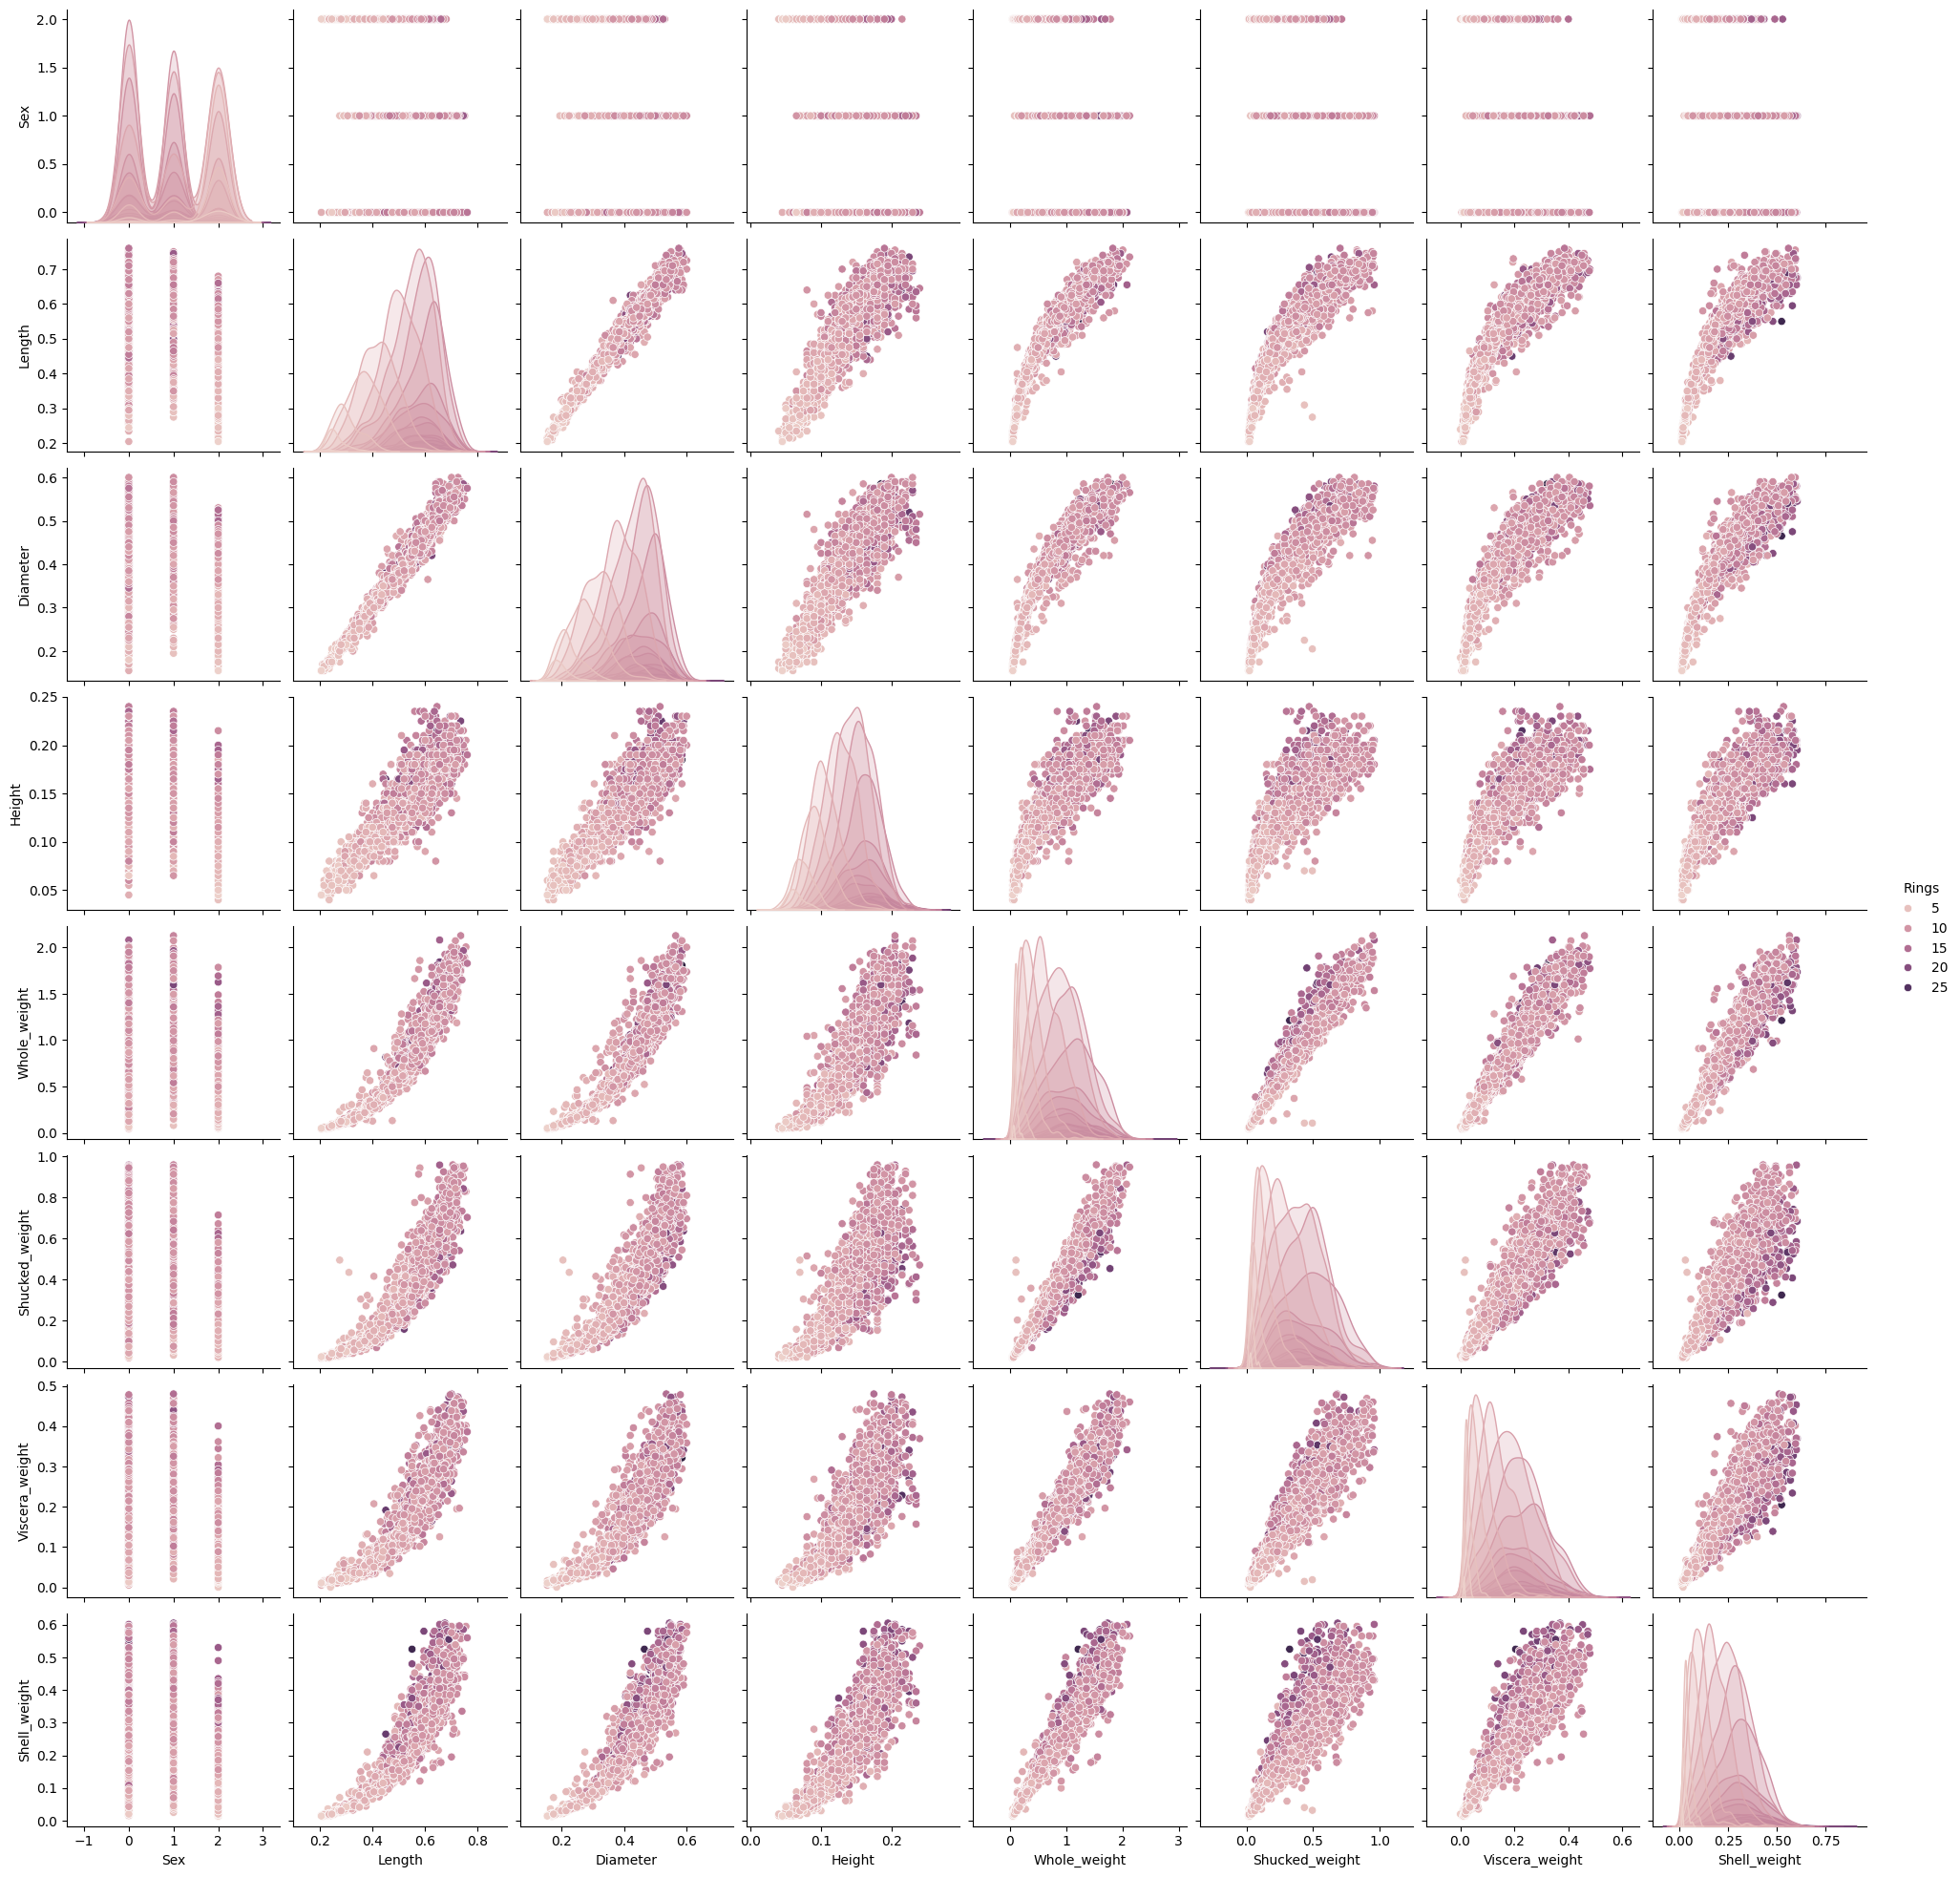

 ACCURACY OF OTHER ML CLASSIFIERS

--- SVM Classifier ---
0.7858032378580324
[[486  58]
 [114 145]]

--- Logistic Regression Classifier ---
0.7745952677459527
[[476  68]
 [113 146]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



--- Neural Network Classifier ---
0.7745952677459527
[[457  87]
 [ 94 165]]

--- Decision Tree Classifier ---
0.7135740971357409
[[425 119]
 [111 148]]

--- Radom Forest ---
0.7833125778331258
[[471  73]
 [101 158]]


In [3]:
from os import X_OK
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
import warnings

df = pd.read_csv("/content/drive/MyDrive/abalone.csv", index_col=0)

# 결측치 확인
df.isnull().sum()

#방법 2 : Sex label만 정수형으로 label encoding

target_label = df['Sex']
target_label.dtype
mapping = {'M':0, 'F':1,'I':2}
df['Sex'] = target_label.map(mapping)
df.head()

# 이상치 탐지 및 제거 함수
def outlier(df, labels):
    for label in labels:
        plt.boxplot(df[label])
        plt.title(f'Box plot for Outlier Detection ({label})')
        plt.show()

        Q1 = df[label].quantile(0.25)
        Q3 = df[label].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[label] > lower_bound) & (df[label] < upper_bound)]

        # 이상치 제거 후 시각화
        plt.boxplot(df[label])
        plt.title(f'Box plot for Outlier Detection After Removal ({label})')
        plt.show()

    return df
labels = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']

df_cleaned =outlier(df,labels)
df_cleaned

# 레이블 갯수 확인 (숫자)
df_cleaned['Rings'].value_counts()

# 결측치 제거
df = df_cleaned.dropna()
df_cleaned.isnull().sum()

# pairplot를 사용해 각 상관관계 살펴보기

sns.pairplot(df,
             vars=['Sex','Length',	'Diameter',	'Height','Whole_weight',	'Shucked_weight',	'Viscera_weight',	'Shell_weight'],
            hue ='Rings')
plt.show()

X=df_cleaned.drop('Rings',axis=1)
X.head()

y=df_cleaned['Rings']
y.value_counts()

print ("==================================")
print (" ACCURACY OF OTHER ML CLASSIFIERS" )
print ("==================================")

# 범주형 데이터 인코딩 (One-Hot Encoding)
categorical_features = ['Sex']
numerical_features = ['Sex','Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']

# 전처리 파이프라인 설정
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),  # 수치형 데이터 스케일링
        ('cat', OneHotEncoder(), categorical_features)  # 범주형 데이터 원핫 인코딩
    ])

def categorize_rings(rings):
    if rings <= 10:
        return 0  # 클래스 0
    else:
        return 2  # 클래스 1

# Rings 컬럼에 범주형 변환 적용
y_categorized = df_cleaned['Rings'].apply(categorize_rings)

# 데이터 전처리 및 분할 (이전과 동일한 방식)
X_processed = preprocessor.fit_transform(X)

# 데이터를 훈련+검증 세트와 테스트 세트로 나누기
X_train_val, X_test, y_train_val, y_test = train_test_split(X_processed, y_categorized, test_size=0.2, random_state=42)

# 훈련+검증 세트를 훈련 세트와 검증 세트로 나누기
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

#SVM
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))

# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))

clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

#NN
pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))

# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))

warnings.filterwarnings('ignore')

#Random forest
print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))

# 2. 딥러닝 수행하기

결측값 확인:
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64


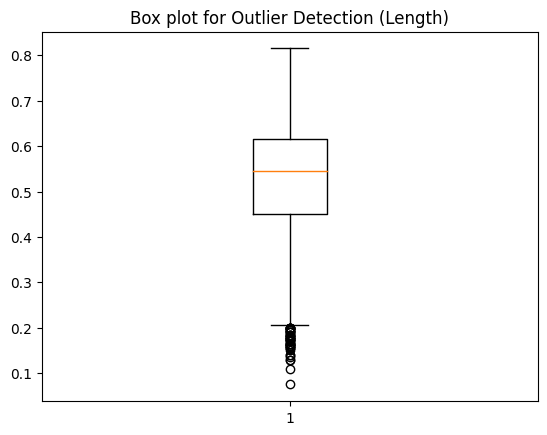

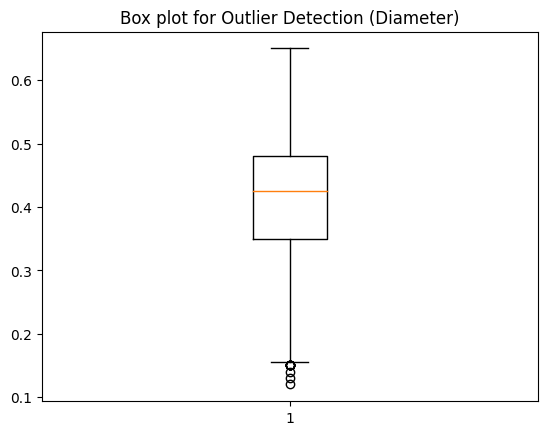

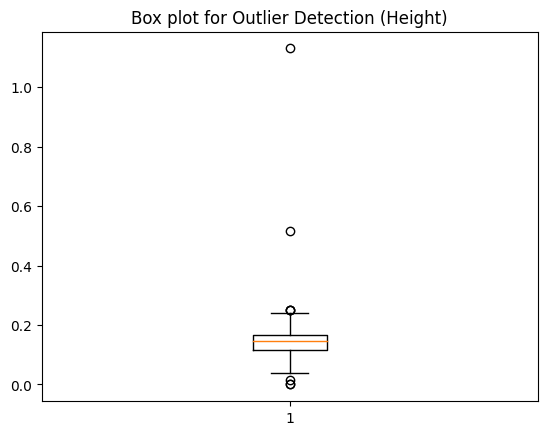

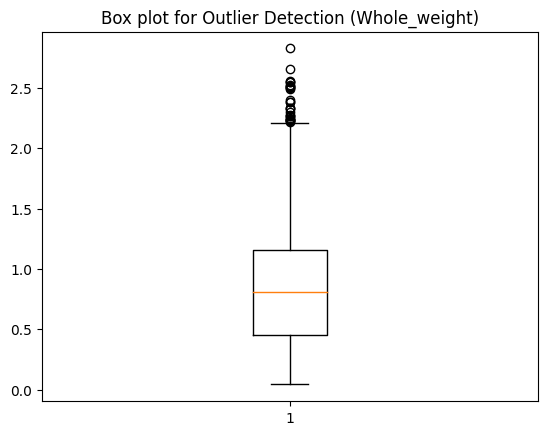

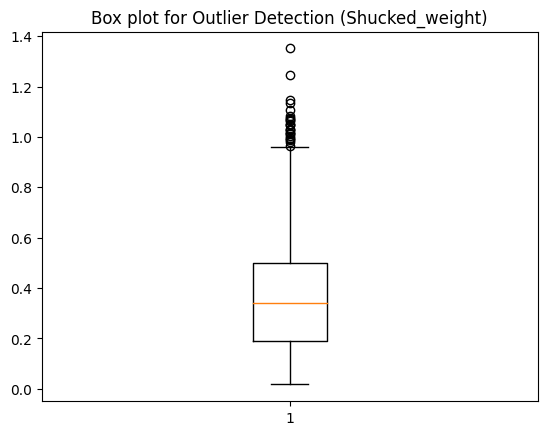

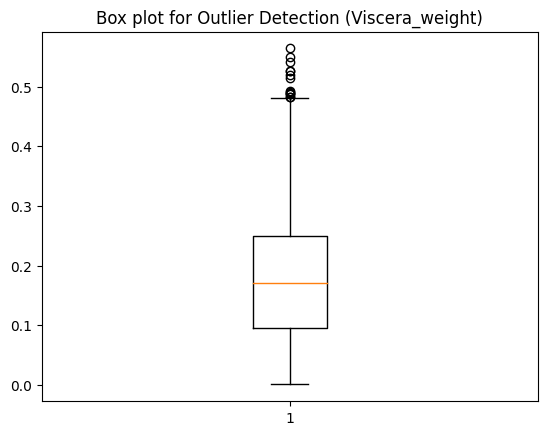

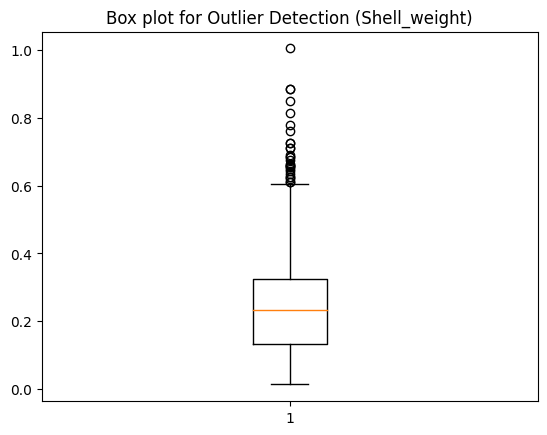

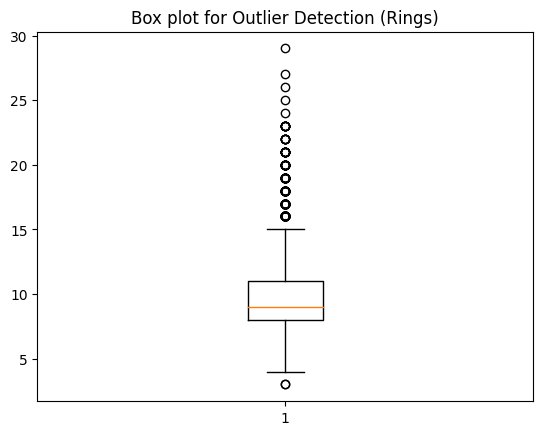

Epoch 1/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.3621 - loss: 1.4960 - val_accuracy: 0.3457 - val_loss: 1.2628
Epoch 2/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4158 - loss: 1.2603 - val_accuracy: 0.6808 - val_loss: 0.9944
Epoch 3/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5315 - loss: 1.0499 - val_accuracy: 0.7854 - val_loss: 0.8248
Epoch 4/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5964 - loss: 0.9542 - val_accuracy: 0.8411 - val_loss: 0.7434
Epoch 5/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6480 - loss: 0.8633 - val_accuracy: 0.8662 - val_loss: 0.6822
Epoch 6/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6881 - loss: 0.8123 - val_accuracy: 0.8874 - val_loss: 0.6296
Epoch 7/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7236 - loss: 0.7578 - val_accuracy: 0.8927 - val_loss: 0.5847
Epoch 8/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7449 - loss: 0.7159 - val_accuracy: 0.9073 - val_loss

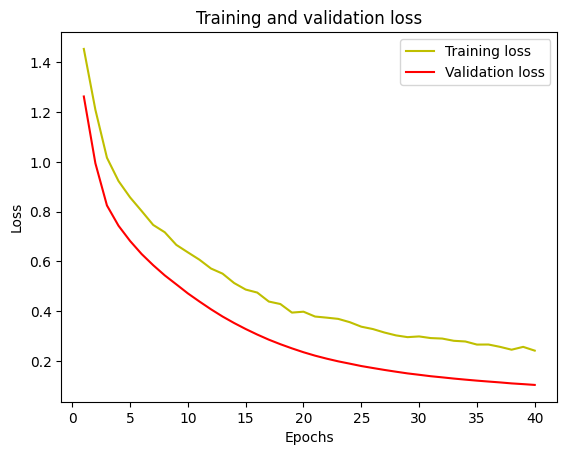

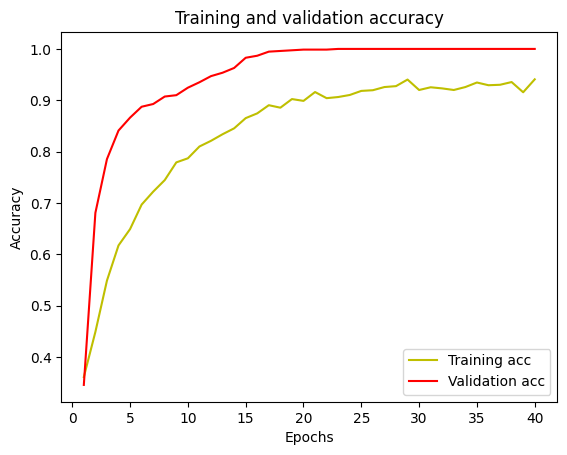

최종 훈련 정확도 : 0.9408
최종 검증 정확도 : 1.0000
테스트 세트 정확도 : 1.0000


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix

# 데이터 로드 및 결측값 확인
df = pd.read_csv("/content/drive/MyDrive/abalone.csv", index_col=0)
print("결측값 확인:")
print(df.isnull().sum())

# 결측값 제거
df = df.dropna()

# 범주형 데이터 레이블 인코딩
mapping = {'M': 0, 'F': 1, 'I': 2}
df['Sex'] = df['Sex'].map(mapping)

# 이상치 탐지 및 제거 함수 정의
def outlier(df, labels):
    for label in labels:
        plt.boxplot(df[label])
        plt.title(f'Box plot for Outlier Detection ({label})')
        plt.show()

        Q1 = df[label].quantile(0.25)
        Q3 = df[label].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[label] > lower_bound) & (df[label] < upper_bound)]
    return df

# 레이블 리스트 정의
numerical_features = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']
labels = numerical_features + ['Rings']

# 이상치 제거
df_cleaned = outlier(df, labels)

# 설명 변수(X)와 타겟 변수(y) 분리
X = df_cleaned.drop(['Rings'], axis=1)
y = df_cleaned['Rings']

# 원-핫 인코딩을 위한 타겟 변수 준비
onehot_encoder = OneHotEncoder(sparse=False)
y_onehot = onehot_encoder.fit_transform(df_cleaned[['Sex']])

# 데이터 분할 (훈련+검증 세트와 테스트 세트로 나누기)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# 데이터 전처리: 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# 모델 정의
model = Sequential([
    Dense(8, input_shape=(X_train.shape[1],), activation='tanh'),
    Dropout(0.4),
    Dense(4, activation='tanh', kernel_regularizer=keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
model_history = model.fit(x=X_train, y=y_train, epochs=40, batch_size=64, validation_data=(X_val, y_val))

# 모델 예측
y_pred = model.predict(X_test)

# 손실 그래프 시각화
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 정확도 그래프 시각화
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 최종 정확도 출력
train_acc = model_history.history['accuracy'][-1]
val_acc = model_history.history['val_accuracy'][-1]
print(f"최종 훈련 정확도 : {train_acc:.4f}")
print(f"최종 검증 정확도 : {val_acc:.4f}")

# 테스트 데이터 평가
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"테스트 세트 정확도 : {test_acc:.4f}")


#3.  Rings를 예측하는 회귀를 수행하라.

결측값 확인:
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64


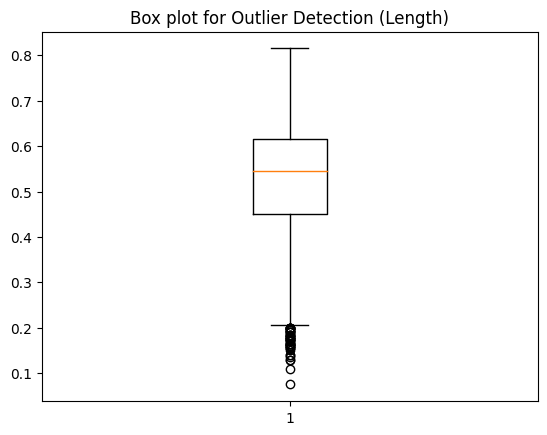

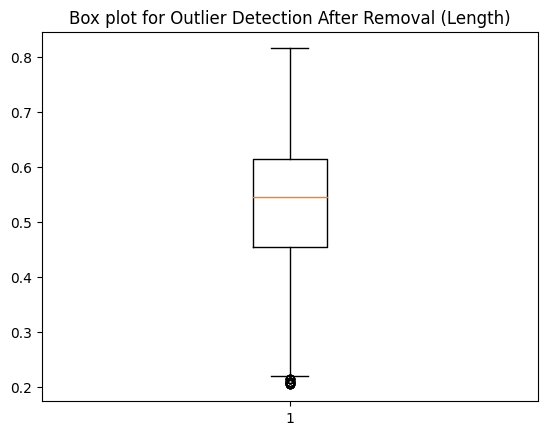

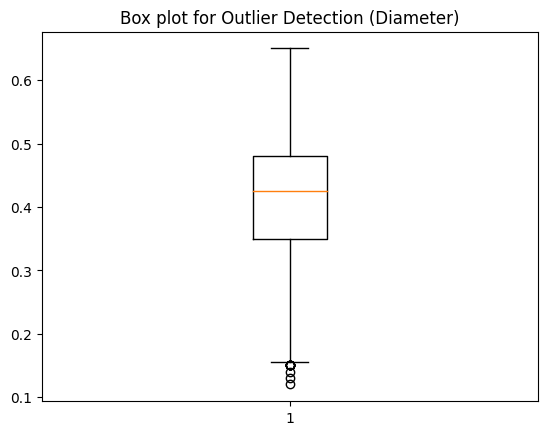

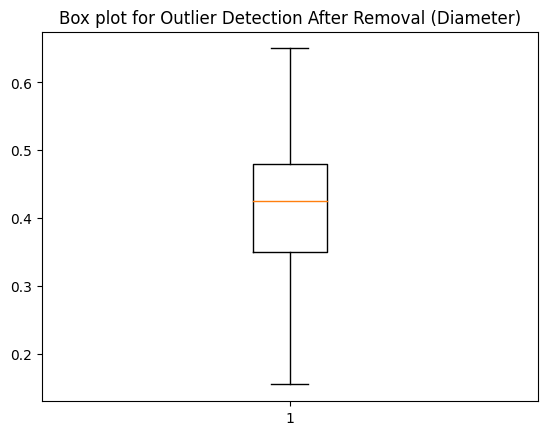

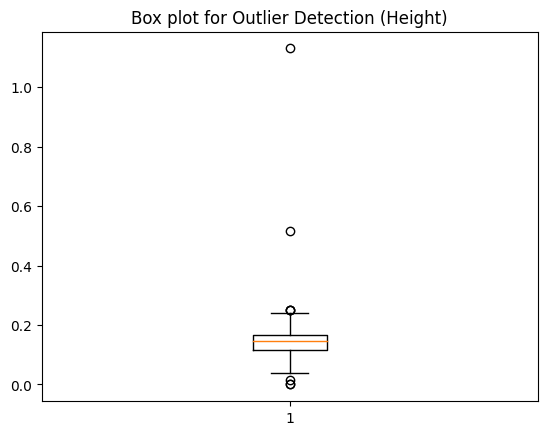

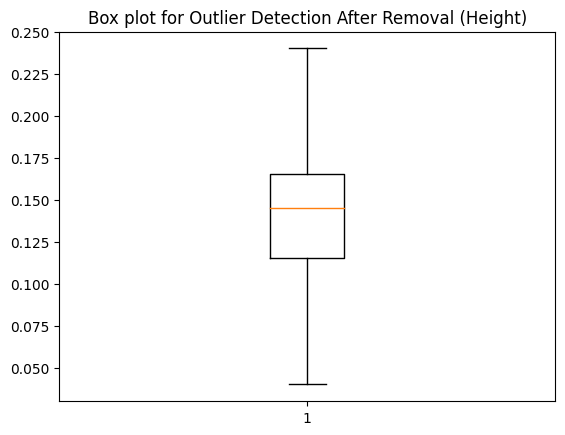

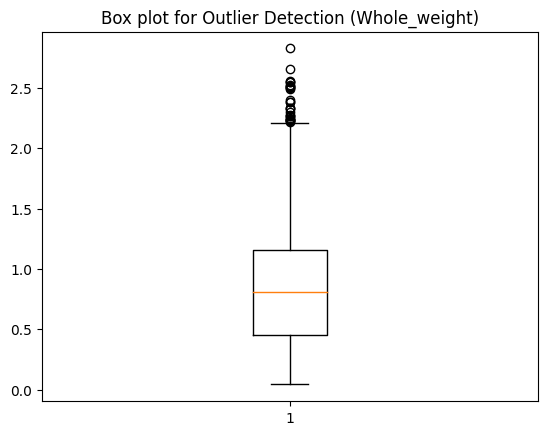

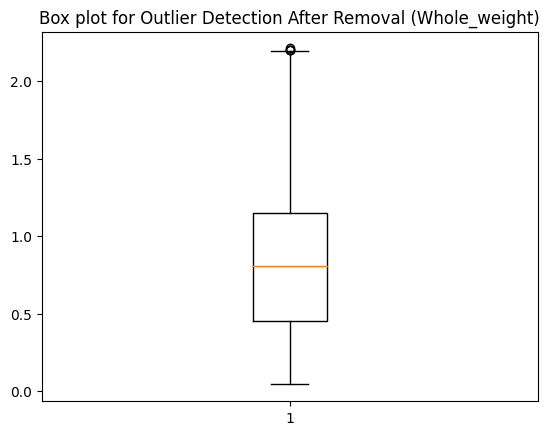

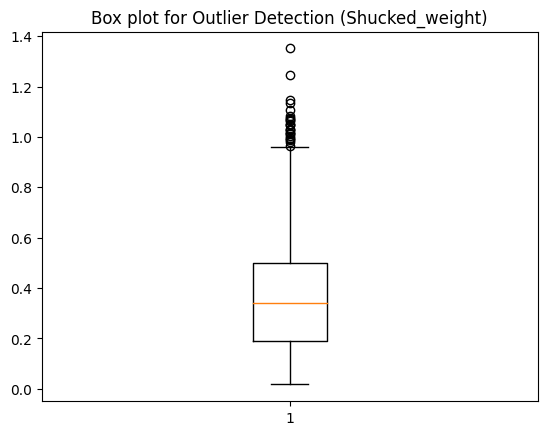

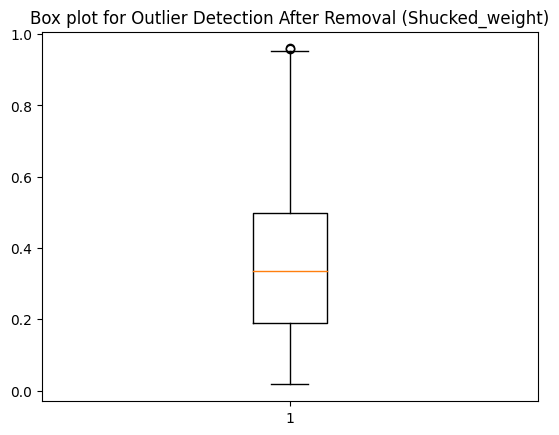

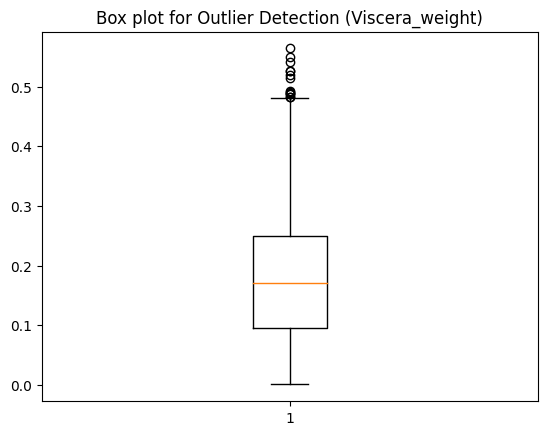

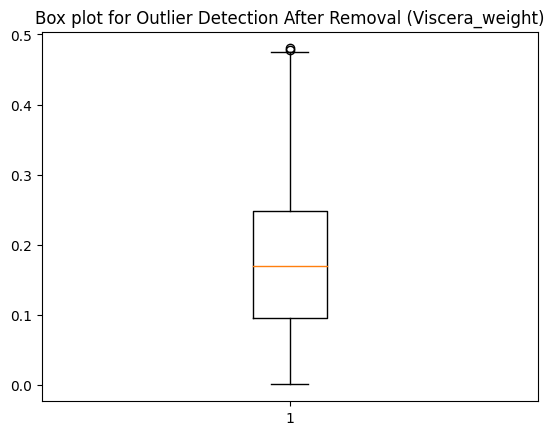

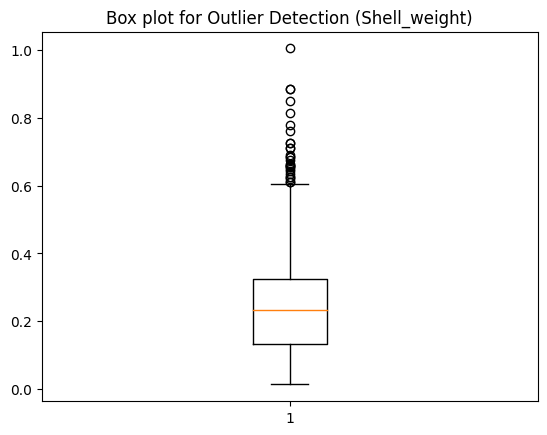

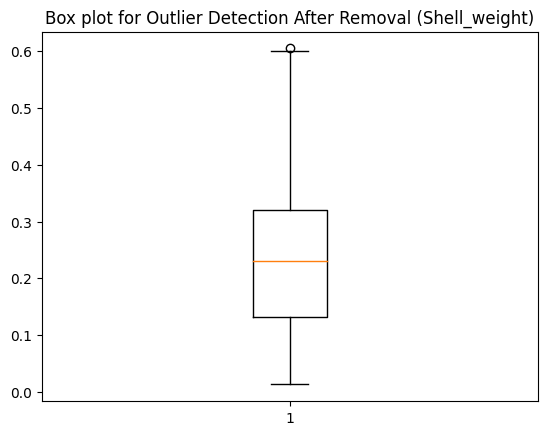

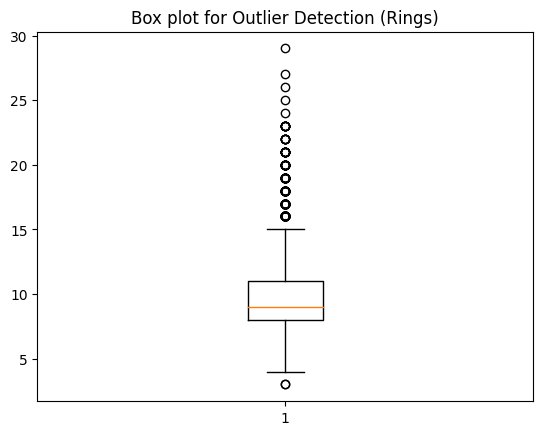

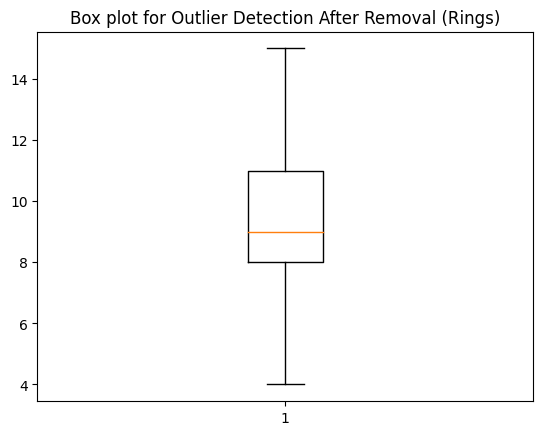

평균제곱근오차(LinearRegression) 2.6424854295383313
평균제곱근오차(mse_up) 2.6424854295383313
평균제곱근오차(mse) 2.6424854295383287
평균제곱근오차(DicisionTreeRegression) 4.3144876325088335
평균제곱근오차(RandomForestRegression) 2.4434369257950532
평균제곱근오차(SVR) 2.8623378623315854


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


# 데이터 로드 및 결측값 확인
df = pd.read_csv("/content/drive/MyDrive/abalone.csv", index_col=0)
print("결측값 확인:")
print(df.isnull().sum())

# 범주형 데이터 인코딩 (One-Hot Encoding)
categorical_features = ['Sex']
numerical_features = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']

# 전처리 파이프라인 설정
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),  # 수치형 데이터 스케일링
        ('cat', OneHotEncoder(), categorical_features)  # 범주형 데이터 원핫 인코딩
    ])

#방법 2 : 레이블 인코딩

target_label = df['Sex']

target_label.dtype

mapping = {'M':0, 'F':1,'I':2}

df['Sex'] = target_label.map(mapping)

df.head()

# 이상치 탐지 및 제거 함수
def outlier(df, labels):
    for label in labels:
        plt.boxplot(df[label])
        plt.title(f'Box plot for Outlier Detection ({label})')
        plt.show()

        Q1 = df[label].quantile(0.25)
        Q3 = df[label].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[label] > lower_bound) & (df[label] < upper_bound)]

# 이상치 제거 후 시각화
        plt.boxplot(df[label])
        plt.title(f'Box plot for Outlier Detection After Removal ({label})')
        plt.show()

    return df

# 레이블 리스트
labels = numerical_features + ['Rings']

# 이상치 탐지 및 제거
df_cleaned = outlier(df, labels)

# 데이터 준비
X = df_cleaned.drop('Rings', axis=1)
y = df_cleaned['Rings']

# 데이터셋 분할 (훈련용/검증용/테스트용)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 데이터 전처리
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

#모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차(LinearRegression)', mean_squared_error(ly_preds, y_test))

def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('평균제곱근오차(mse_up)', mse_np(ly_preds, y_test))

def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차(mse)', mse(ly_preds, y_test))

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

dy_preds = model.predict(X_test)
print('평균제곱근오차(DicisionTreeRegression)', mean_squared_error(dy_preds, y_test))


model = RandomForestRegressor()
model.fit(X_train, y_train)

ry_preds = model.predict(X_test)
print('평균제곱근오차(RandomForestRegression)', mean_squared_error(ry_preds, y_test))

model = SVR(kernel='linear')
model.fit(X_train, y_train)

ry_preds = model.predict(X_test)
print('평균제곱근오차(SVR)', mean_squared_error(ry_preds, y_test))


#4. dense layer만 사용한 신경망으로 회귀를 수행

결측값 확인:
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64


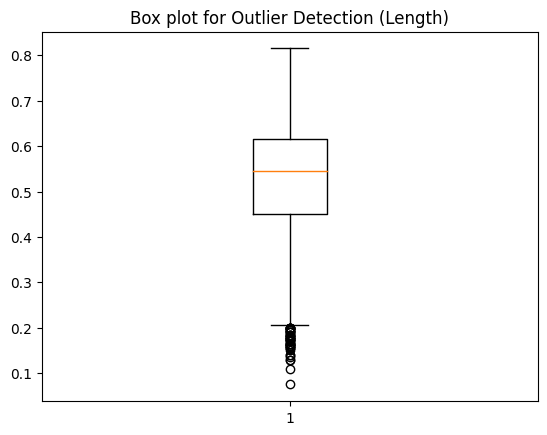

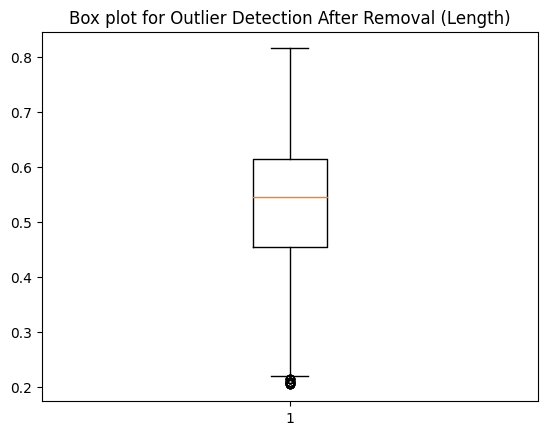

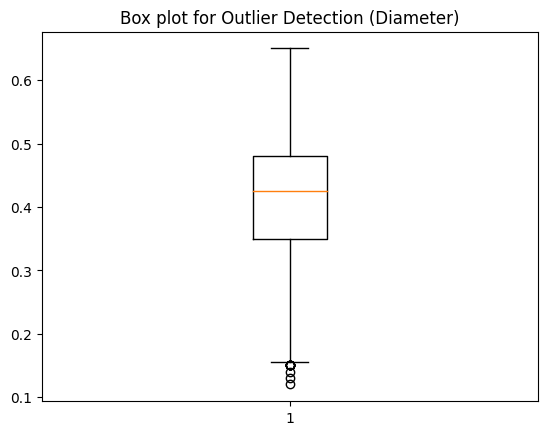

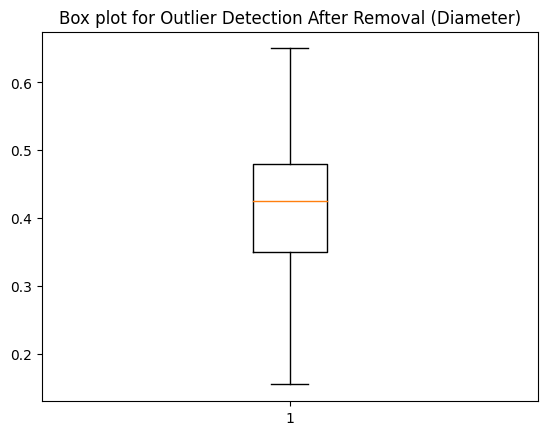

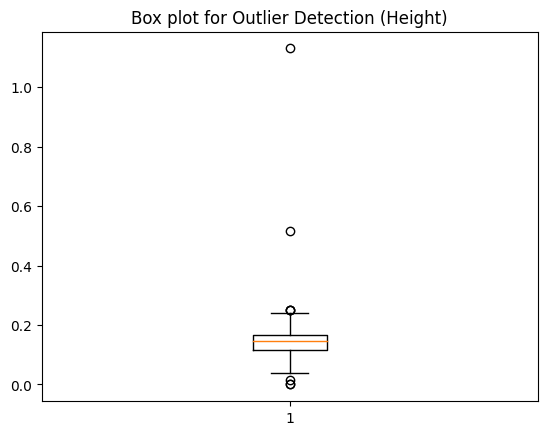

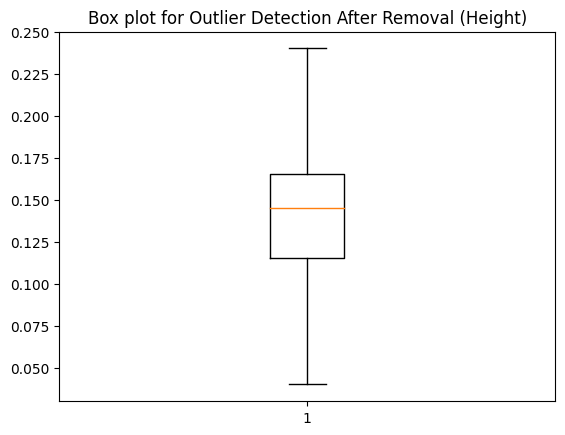

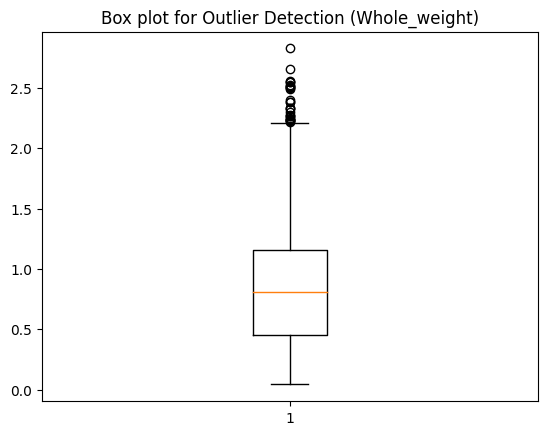

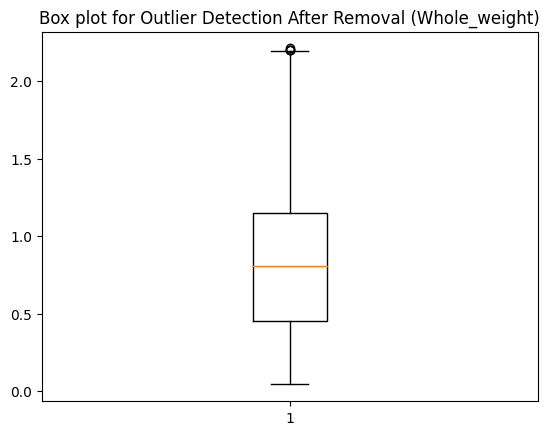

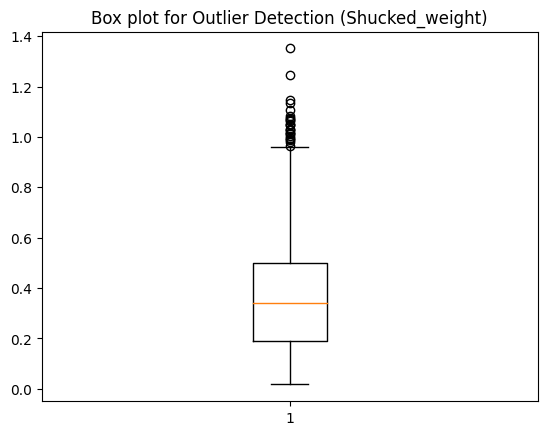

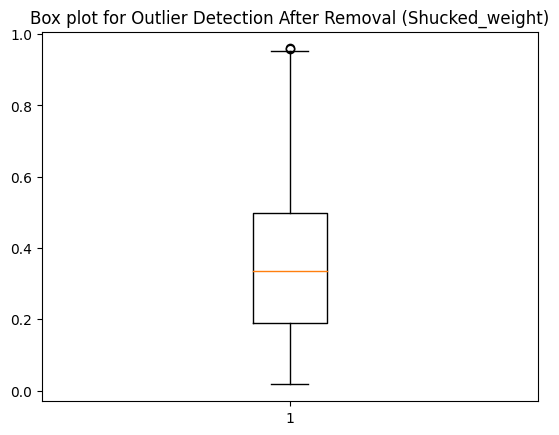

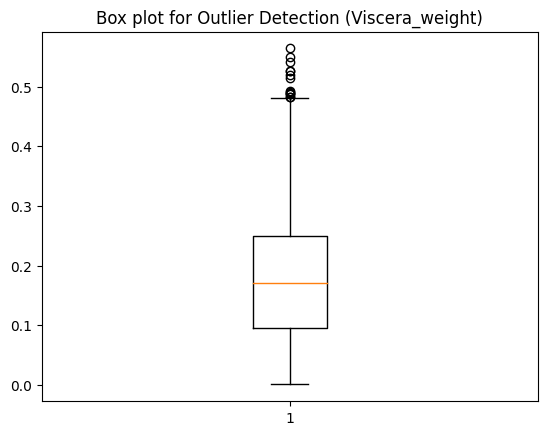

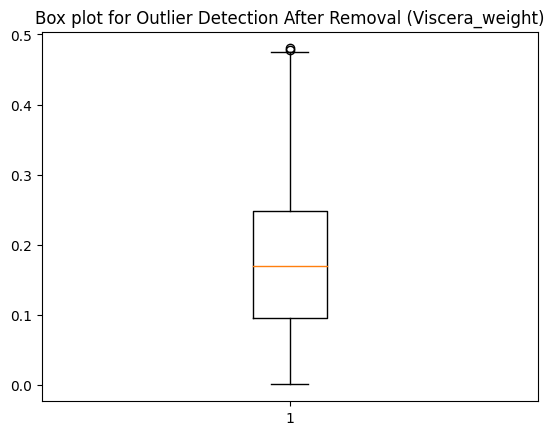

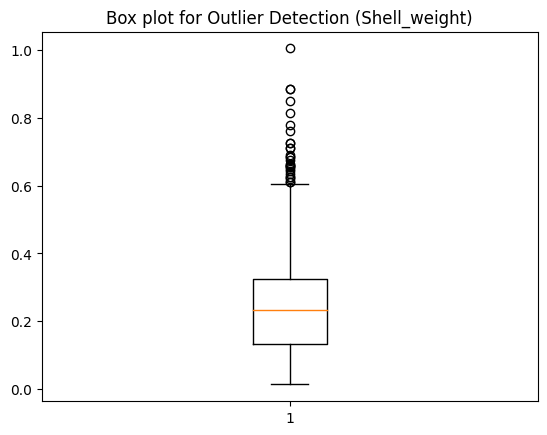

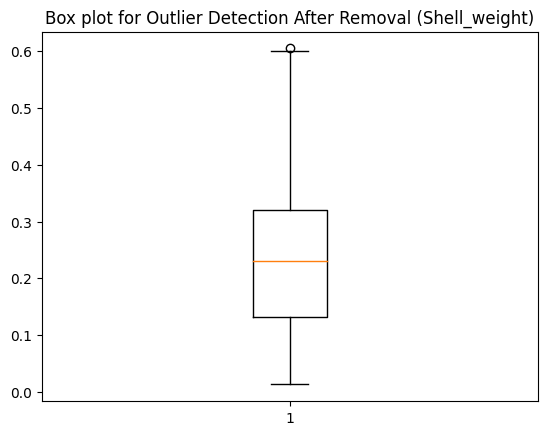

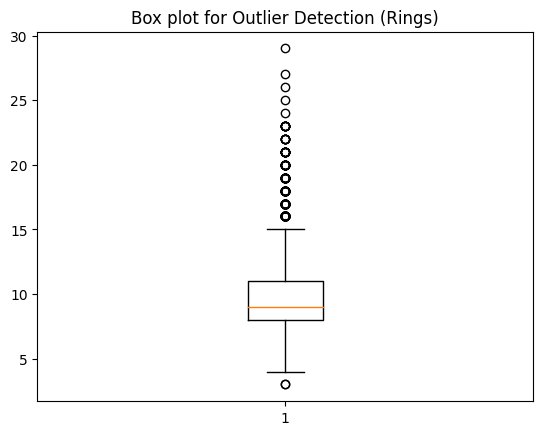

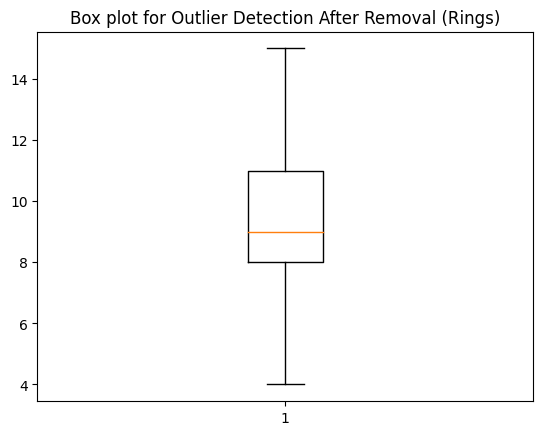

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 80.6034 - mae: 8.6652 - val_loss: 41.3646 - val_mae: 6.0839 - learning_rate: 0.0010
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29.5760 - mae: 4.9170 - val_loss: 9.0148 - val_mae: 2.3867 - learning_rate: 0.0010
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.8248 - mae: 1.9896 - val_loss: 4.7696 - val_mae: 1.6889 - learning_rate: 0.0010
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.4281 - mae: 1.6030 - val_loss: 4.1477 - val_mae: 1.6003 - learning_rate: 0.0010
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.1189 - mae: 1.5976 - val_loss: 3.8410 - val_mae: 1.5231 - learning_rate: 0.0010
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.7993 - mae: 1.5131 - val_loss: 3.6112 - val_mae: 1.4508 - learning_rate: 0.0010
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5759 - mae: 1.4418 - val_loss: 3.4832 - val_mae: 1.4227 - learning_rate: 0.0010
Epoch 8/10

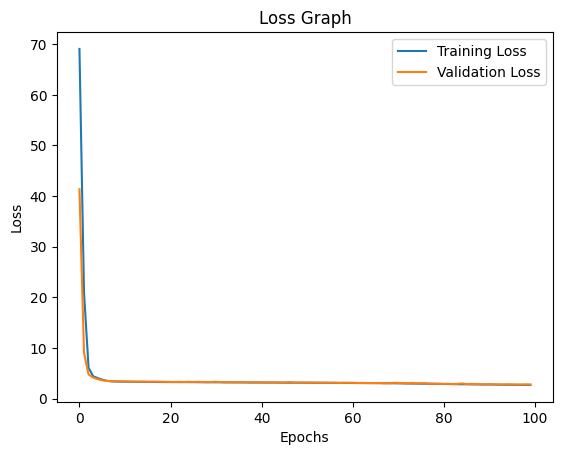

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4844 - mae: 1.2166 
Test MSE: 2.61
Test MAE: 1.26


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


# 데이터 로드 및 결측값 확인
df = pd.read_csv("/content/drive/MyDrive/abalone.csv", index_col=0)
print("결측값 확인:")
print(df.isnull().sum())

# 범주형 데이터 인코딩 (One-Hot Encoding)
categorical_features = ['Sex']
numerical_features = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']

# 전처리 파이프라인 설정
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),  # 수치형 데이터 스케일링
        ('cat', OneHotEncoder(), categorical_features)  # 범주형 데이터 원핫 인코딩
    ])

# 이상치 탐지 및 제거 함수
def outlier(df, labels):
    for label in labels:
        plt.boxplot(df[label])
        plt.title(f'Box plot for Outlier Detection ({label})')
        plt.show()

        Q1 = df[label].quantile(0.25)
        Q3 = df[label].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[label] > lower_bound) & (df[label] < upper_bound)]

        # 이상치 제거 후 시각화
        plt.boxplot(df[label])
        plt.title(f'Box plot for Outlier Detection After Removal ({label})')
        plt.show()

    return df

# 레이블 리스트
labels = numerical_features + ['Rings']

# 이상치 탐지 및 제거
df_cleaned = outlier(df, labels)

# 데이터 준비
X = df_cleaned.drop('Rings', axis=1)
y = df_cleaned['Rings']

# 데이터셋 분할 (훈련용/검증용/테스트용)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 데이터 전처리
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

# 모델 정의
model = Sequential()
model.add(Dense(8, input_dim=X_train_processed.shape[1], activation='tanh'))
Dropout(0.3)
model.add(Dense(30, activation='tanh'))
model.add(Dense(30, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# 모델 학습
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(X_train_processed, y_train, epochs=100, validation_data=(X_val_processed, y_val), batch_size=64, callbacks=[early_stopping,reduce_lr])

# 손실 그래프 시각화
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

# 테스트 데이터로 모델 최종 평가
test_loss, test_mae = model.evaluate(X_test_processed, y_test)
print(f"Test MSE: {test_loss:.2f}")
print(f"Test MAE: {test_mae:.2f}")
